# 1. Business Understanding (İşin Anlaşılması):

Basit bir metin üzerinde Doğal Dil İşleme uygulaması gerçekleştireceğiz.

Burada istenilen konuların pekiştirilmesi amaçlanmaktadır.

> O konular da şu şekildedir:

Metin üzerinde veri ön işleme aşamalarının gerçekleştirilmesi amaçlanmaktadır.

Bu ön işleme adımları şu şekilde olabilir:

-- Fazla boşlukların silinmesi, 

-- Büyük küçük harf dönüşümleri

-- Noktalama işaretlerinin kaldırılması (Removing Punctuation)

-- Özel karakterlerin kaldırılması

-- Yazım hatalarının düzeltilmesi

-- HTML ve URL temizleme işlemleri


> Önemli Notlar:

<mark><em>Removing Stopwords</em></mark> → Genellikle metin içerisinde anlamı çok az olan yani etkisi çok sınırlı, edat, bağlaç vb. cümlenin ögeleridir. "the","with", "on", "at" etc. örnek verilebilir.


Sonraki aşamalardan birisi de

> 
<mark><em>Tokenizasyon</em></mark>: 

Metni daha küçük parçalara ayırma işlemidir.

Bunlar bildiğiniz üzere farklı şekilde ayrılabilir.

Kelime kelime, cümle cümle veya karakter karakter gibi ayrımlar yapılabilir.


<mark><em>Lemmatization</em></mark>:

Doğal Dil İşlemede (NLP) kullanılan önemli bir tekniktir. 

Bu işlemin temel amacı, kelimelerin farklı çekimli hallerini (çoğul, geçmiş zaman vb.) onların sözlükteki temel formuna yani "lemma"'sına indirgemektir.

Örneğin: "yüzüyor", "yüzdüm", "yüzecek" kelimelerinin yüzmek olarak kök formunu bulacaktır.

> Note:

Bu teknik, kelimeleri sadece eklerinden arındırmak yerine, onların cümle içindeki anlamına ve gramer yapısına bakarak en doğru kök formu bulmaya çalışır.

Bir diğer kavram olarak da karşımıza Lemmatization <mark><b>(Gövdeleme)</b></mark> ve <mark><b>Stemming (Kök Bulmak)</b></mark> çıkmaktadır:

Bildiğiniz üzere dilimizde de kök, gövde gibi kavramlar bulunmaktadır.İlkokul veya ortaokul yıllarımıza dönersek:

=> Yapım eki almamış ve başka bir sözcükle birleşmemiş sözcükler köktür. 

Örneğin sev

=> Yapım eki almış ya da başka bir sözcükle birleşmiş sözcükler gövdedir.

Örneğin sevgi


İlerleyen aşamalarda da:

- Named Entity Recognition (NER) → Kişi adları, yer adları, kurumlar vb. tespitinin gerçekleştirilmesi

- Part-of-Speech (POS) Tagging → Her kelimenin türünün belirlenmesi (isim mi, fiil mi, sıfat mı, zarf mı...)

- Word Frequency Count → En sık geçen kelimelerin tespit edilmesi

- Text Visualization → Word cloud, bar chart vb. görselleştirme teknikleri veya araçlarıyla kelimelerin görselleştirilmesi



In [1]:
# import required libraries (Gerekli kutuphane kurulumlari)

# for linear algebra (lineer cebir icin)
import numpy as np

# for data manipulation (veri manipulasyonu)
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns #

# for NLP
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


# for word preprocessing
from textblob import Word, TextBlob

# for word visualization
from wordcloud import WordCloud 

# set warning options 
from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


# 2. Data Understanding (Verinin Anlaşılması):
NLP (Natural Language Processing = Doğal Dil İşleme) alanına benim gibi yeni başlayanlar için faydalı olacağını düşündüğüm bir konferans konuşmasının analiz edilmesini içermektedir.

Emily Watson tarafından gerçekleştirilen konferansta özetle, doğal dil işleme kütüphaneleri sayesinde çok fazla finansal güce sahip olunmasının gerekli olmadığı, katıldığı çeşitli etkinliklerde yapay zekanın gelecekteki işbirlik fırsatlarına yönelik tartışmalarda bulunduğu ve bunun çeşitli platformlarda etki bıraktığı olarak özetleyebilirim.

In [ ]:
example_str = '''On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France. During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.

She mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. Furthermore, she highlighted the role of open-source libraries, such as spaCy and NLTK, in democratizing access to natural language processing tools. According to her, students and researchers can now build high-quality NLP models without needing large financial resources.

"AI is not just about machines," she said, "it's about how we interact with technology in a human-centered way." After the session, attendees from universities like Stanford, MIT, and Oxford approached her to discuss future collaboration opportunities.

At 5:45 PM, she posted a summary of her speech on Twitter, receiving over 8,000 likes and 1,200 retweets within a few hours. Her tweet included hashtags like #AIethics, #DataPrivacy, and #NLPtools.

The event concluded with a panel discussion moderated by Mr. John Lee, a journalist from TechWorld Weekly, who asked, “How can governments regulate AI without stifling innovation?''' 

# 3. Data Preparing and Preprocessing (Verinin Hazırlanması ve Önişlenmesi):
Verimizi, işin anlaşılması kısmında da dile getirdiğimiz gibi makinenin anlayabileceği bir formata getirmemiz gerekmektedir. 

Makineler, 0 ve 1'lerden anlar diye boşuna demiyorlar:)

In [4]:
example_str_len = len(example_str)
print(f"Data size without pre-processing (Veri önişleme öncesi boyutu): {example_str_len}")

Data size without pre-processing (Veri önişleme öncesi boyutu): 1353


In [ ]:
# 3.1. Convert all to lowercase (Hepsini kucuk harfe donustur)
lower_example_str = example_str.lower()
print("Converted String:\n", lower_example_str)
print("*"*100,"\n")
len_lower_example_str = len(lower_example_str)
print(f"Length of Lower Example: {len_lower_example_str}")

Converted String:
 on january 3rd, 2023, dr. emily watson, a senior data scientist at greenai inc., gave a keynote speech at the international conference on artificial intelligence in paris, france. during her talk, she emphasized the importance of ethical ai and data privacy, citing recent cases of misuse in various industries.

she mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. furthermore, she highlighted the role of open-source libraries, such as spacy and nltk, in democratizing access to natural language processing tools. according to her, students and researchers can now build high-quality nlp models without needing large financial resources.

"ai is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." after the session, attendees from universities like stanford, mit, and oxford approached her to discuss future collaboration opportunities.

at 5:4

In [ ]:
# 3.2. Remove punctuations (Ozel isaretlerin kaldirilmasi)
from string import punctuation

print(f"Punctuations: {punctuation}")


#trimmed_str = lower_example_str.strip()
#trimmed_str

Punctuations: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


"""

Some Basic RegEx (Bazı Basit Regular Expression'lar)
<mark>regex (regular expressions)</mark>

    ^ => starts with (baslar)

    $ => ends with (biter)
    
    \w => Returns a match where the string contains any word characters 
        (characters from a to Z, digits from 0-9, and the underscore _ character) (alfanumerikleri (0-9, a-Z) döndürür)    
    
    \W => 	Returns a match where the string DOES NOT contain any word characters
    
    \s =>	Returns a match where the string contains a white space character (Space yani bosluk karakterini ifade eder)
    
    [] => 	A set of characters example 	"[a-m]" => Bir karakter setini ifade eder. Örnekte de a'dan m'ye kadar anlamına gelir.
"""

In [19]:
import re 

non_punctuation_str = re.sub(r"[^\w\s]", "",lower_example_str)
print(f"String Without Punctuation Marks (Noktalama Isaretsiz Metin):\n\n {non_punctuation_str}")

String Without Punctuation Marks (Noktalama Isaretsiz Metin):

 on january 3rd 2023 dr emily watson a senior data scientist at greenai inc gave a keynote speech at the international conference on artificial intelligence in paris france during her talk she emphasized the importance of ethical ai and data privacy citing recent cases of misuse in various industries

she mentioned that over 32 million users were affected by a data breach last year resulting in damages estimated at 125 million furthermore she highlighted the role of opensource libraries such as spacy and nltk in democratizing access to natural language processing tools according to her students and researchers can now build highquality nlp models without needing large financial resources

ai is not just about machines she said its about how we interact with technology in a humancentered way after the session attendees from universities like stanford mit and oxford approached her to discuss future collaboration opportunities

In [20]:
len_non_puctuation_str = len(non_punctuation_str)
print(f"Length of string without punctuation marks (Noktalama Isaretsiz Metnin Uzunlugu): {len_non_puctuation_str}")

Length of string without punctuation marks (Noktalama Isaretsiz Metnin Uzunlugu): 1298


In [ ]:
# 3.3. Remove numbers (Sayilari kaldir)
numberless_str = re.sub(r"\d+", "", non_punctuation_str)
print("text with non-numeric punctuation removed (Noktalama Isaretleri ve Sayilar Kaldirilmis Metin): \n")
print(numberless_str)
print("*"*150,"\n")
len_numberless_str = len(numberless_str)
print(f"Length of Numberless String (Sayi Icermeyen Metnin Boyutu): {len_numberless_str}")

text with non-numeric punctuation removed (Noktalama Isaretleri ve Sayilar Kaldirilmis Metin): 

on january rd  dr emily watson a senior data scientist at greenai inc gave a keynote speech at the international conference on artificial intelligence in paris france during her talk she emphasized the importance of ethical ai and data privacy citing recent cases of misuse in various industries

she mentioned that over  million users were affected by a data breach last year resulting in damages estimated at  million furthermore she highlighted the role of opensource libraries such as spacy and nltk in democratizing access to natural language processing tools according to her students and researchers can now build highquality nlp models without needing large financial resources

ai is not just about machines she said its about how we interact with technology in a humancentered way after the session attendees from universities like stanford mit and oxford approached her to discuss future coll

In [ ]:
# 3.4. Removing extra spaces (Fazla olan boşlukların temizlenmesi):
without_extra_spaces_str = re.sub(r'\s+', ' ', numberless_str)
print(f"Without Extra Spaces String (Extra Bosluksuz Metin):\n\n {without_extra_spaces_str}")

print("*"*150)
len_without_extra_spaces = len(without_extra_spaces_str)
print(f"Length of Without Extra Spaces String (Extra Bosluksuz Metnin Boyutu): {len_without_extra_spaces}")

Without Extra Spaces String:

 on january rd dr emily watson a senior data scientist at greenai inc gave a keynote speech at the international conference on artificial intelligence in paris france during her talk she emphasized the importance of ethical ai and data privacy citing recent cases of misuse in various industries she mentioned that over million users were affected by a data breach last year resulting in damages estimated at million furthermore she highlighted the role of opensource libraries such as spacy and nltk in democratizing access to natural language processing tools according to her students and researchers can now build highquality nlp models without needing large financial resources ai is not just about machines she said its about how we interact with technology in a humancentered way after the session attendees from universities like stanford mit and oxford approached her to discuss future collaboration opportunities at pm she posted a summary of her speech on twi

In [ ]:
# Check (Kontrol edelim, basta ve sonda bosluk kaldi mi)
without_extra_spaces_str = without_extra_spaces_str.strip()
print(len(without_extra_spaces_str))

1267


In [ ]:
splitted_str = without_extra_spaces_str.split()
print(f"Splitted String (Bosluklardan Bolunmus Metin):\n\n {splitted_str}")

len_splitted_str = len(splitted_str)
print(f"Length of Splitted String (Bosluklardan Bolunmus Metnin Uzunlugu): {len_splitted_str}")

Splitted String:

 ['on', 'january', 'rd', 'dr', 'emily', 'watson', 'a', 'senior', 'data', 'scientist', 'at', 'greenai', 'inc', 'gave', 'a', 'keynote', 'speech', 'at', 'the', 'international', 'conference', 'on', 'artificial', 'intelligence', 'in', 'paris', 'france', 'during', 'her', 'talk', 'she', 'emphasized', 'the', 'importance', 'of', 'ethical', 'ai', 'and', 'data', 'privacy', 'citing', 'recent', 'cases', 'of', 'misuse', 'in', 'various', 'industries', 'she', 'mentioned', 'that', 'over', 'million', 'users', 'were', 'affected', 'by', 'a', 'data', 'breach', 'last', 'year', 'resulting', 'in', 'damages', 'estimated', 'at', 'million', 'furthermore', 'she', 'highlighted', 'the', 'role', 'of', 'opensource', 'libraries', 'such', 'as', 'spacy', 'and', 'nltk', 'in', 'democratizing', 'access', 'to', 'natural', 'language', 'processing', 'tools', 'according', 'to', 'her', 'students', 'and', 'researchers', 'can', 'now', 'build', 'highquality', 'nlp', 'models', 'without', 'needing', 'large', 'finan

In [30]:
# 3.6. Find rare words (Ender Kelimeleri Bul)
from collections import Counter

word_counts = Counter(splitted_str)
print("Word Frequency (Kelime Frekanslari)")
for word, frequency in word_counts.most_common(10):
    print(f"{word}:{frequency}")
print("*"*100)

Word Frequency (Kelime Frekanslari)
a:8
and:6
the:5
in:5
her:5
she:5
at:4
of:4
on:3
data:3
****************************************************************************************************


  Word  Frequency
0    a          8
1  and          6
2  the          5
3   in          5
4  her          5


C:\Users\Asus\AppData\Local\Temp\ipykernel_19044\539006653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_common_10_word_df, x = "Word",y = "Frequency", palette = "Oranges_d")


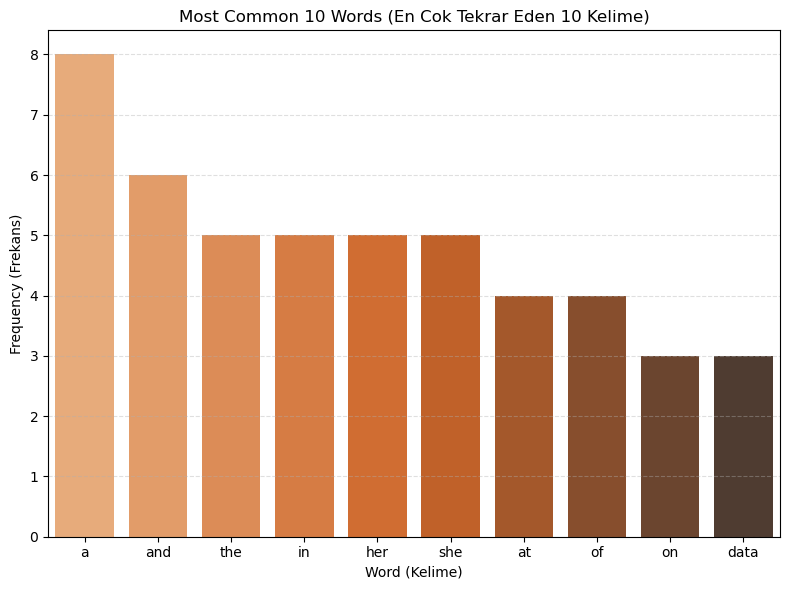

In [46]:
most_common_10_word_df = pd.DataFrame(word_counts.most_common(10), columns =["Word","Frequency"])

print(most_common_10_word_df.head())


plt.figure(figsize = (8,6))
sns.barplot(data = most_common_10_word_df, x = "Word",y = "Frequency", palette = "Oranges_d")
plt.title("Most Common 10 Words (En Cok Tekrar Eden 10 Kelime)")
plt.xlabel("Word (Kelime)")
plt.ylabel("Frequency (Frekans)")
plt.tight_layout()
plt.grid(axis = "y", linestyle = "--", alpha = 0.4)
plt.show()

In [47]:
# find rare words
rare_words = [word for word, count in word_counts.items() if count < 2]
print("Rare Words (Nadir Kelimeler):\n",rare_words)
print("*"*150)
print(f"Count of Rare Words: {len(rare_words)}")

Rare Words (Nadir Kelimeler):
 ['january', 'rd', 'dr', 'emily', 'watson', 'senior', 'scientist', 'greenai', 'inc', 'gave', 'keynote', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'during', 'talk', 'emphasized', 'importance', 'ethical', 'privacy', 'citing', 'recent', 'cases', 'misuse', 'various', 'industries', 'mentioned', 'that', 'users', 'were', 'affected', 'breach', 'last', 'year', 'resulting', 'damages', 'estimated', 'furthermore', 'highlighted', 'role', 'opensource', 'libraries', 'such', 'as', 'spacy', 'nltk', 'democratizing', 'access', 'natural', 'language', 'processing', 'tools', 'according', 'students', 'researchers', 'now', 'build', 'highquality', 'nlp', 'models', 'needing', 'large', 'financial', 'resources', 'is', 'not', 'just', 'machines', 'said', 'its', 'we', 'interact', 'technology', 'humancentered', 'way', 'after', 'session', 'attendees', 'universities', 'stanford', 'mit', 'oxford', 'approached', 'discuss', 'future', 'collaboration', 'opp

In [54]:
# 3.7. Fix typo (Yazim hatalari varsa duzelt)
from textblob import TextBlob

# use list comp correct_words = [str(Textblob(word).correct()) for word in splitted_words]
rejoined_str = " ".join(splitted_str)
print(f"Rejoined String (Yeniden Birlestirilmis Metin): {rejoined_str}")
print("*"*150)

cleaned_blob = TextBlob(rejoined_str).correct()

cleaned_str = str(cleaned_blob)

print("Cleaned String (Temizlenmis Metin): \n", cleaned_str)
print("Lenght of Cleaned String (Temizlenmis Metnin Uzunlugu): ", len(cleaned_str))


Rejoined String (Yeniden Birlestirilmis Metin): on january rd dr emily watson a senior data scientist at greenai inc gave a keynote speech at the international conference on artificial intelligence in paris france during her talk she emphasized the importance of ethical ai and data privacy citing recent cases of misuse in various industries she mentioned that over million users were affected by a data breach last year resulting in damages estimated at million furthermore she highlighted the role of opensource libraries such as spacy and nltk in democratizing access to natural language processing tools according to her students and researchers can now build highquality nlp models without needing large financial resources ai is not just about machines she said its about how we interact with technology in a humancentered way after the session attendees from universities like stanford mit and oxford approached her to discuss future collaboration opportunities at pm she posted a summary of 

In [55]:
cleaned_splitted_str = cleaned_str.split()
print("Cleaned Splitted String (Bosluklarla Ayrilmis Temizlenmis Metin):\n", cleaned_splitted_str)
print("*"*150)
print("Length of Cleaned Splitted String (Bosluklarla Ayrilmis Temizlenmis Metnin Uzunlugu): ",len(cleaned_splitted_str))

Cleaned Splitted String (Bosluklarla Ayrilmis Temizlenmis Metin):
 ['on', 'january', 'rd', 'dr', 'emily', 'watson', 'a', 'senior', 'data', 'scientist', 'at', 'green', 'in', 'gave', 'a', 'denote', 'speech', 'at', 'the', 'international', 'conference', 'on', 'artificial', 'intelligence', 'in', 'paris', 'france', 'during', 'her', 'talk', 'she', 'emphasized', 'the', 'importance', 'of', 'ethical', 'ai', 'and', 'data', 'privacy', 'biting', 'recent', 'cases', 'of', 'disuse', 'in', 'various', 'industries', 'she', 'mentioned', 'that', 'over', 'million', 'users', 'were', 'affected', 'by', 'a', 'data', 'breach', 'last', 'year', 'resulting', 'in', 'damages', 'estimated', 'at', 'million', 'furthermore', 'she', 'highlight', 'the', 'role', 'of', 'opensource', 'libraries', 'such', 'as', 'space', 'and', 'not', 'in', 'democratizing', 'access', 'to', 'natural', 'language', 'processing', 'tools', 'according', 'to', 'her', 'students', 'and', 'researches', 'can', 'now', 'build', 'highquality', 'nap', 'models

In [ ]:
# 3.8. Tokenization (Tokenlastirma): Metni parcalara bolecegiz, ister kelime kelime, ister cumle cumle
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [56]:
from nltk.tokenize import sent_tokenize, word_tokenize

tokenized_word = word_tokenize(rejoined_str)
print("Tokenized Word (Kelime Kelime Bolunen Metin):\n", tokenized_word)
print("*"*150)
print(f"Length of Tokenized Word (Kelime Kelime Ayrilmis Metnin Uzunlugu): {len(tokenized_word)} ")

Tokenized Word (Kelime Kelime Bolunen Metin):
 ['on', 'january', 'rd', 'dr', 'emily', 'watson', 'a', 'senior', 'data', 'scientist', 'at', 'greenai', 'inc', 'gave', 'a', 'keynote', 'speech', 'at', 'the', 'international', 'conference', 'on', 'artificial', 'intelligence', 'in', 'paris', 'france', 'during', 'her', 'talk', 'she', 'emphasized', 'the', 'importance', 'of', 'ethical', 'ai', 'and', 'data', 'privacy', 'citing', 'recent', 'cases', 'of', 'misuse', 'in', 'various', 'industries', 'she', 'mentioned', 'that', 'over', 'million', 'users', 'were', 'affected', 'by', 'a', 'data', 'breach', 'last', 'year', 'resulting', 'in', 'damages', 'estimated', 'at', 'million', 'furthermore', 'she', 'highlighted', 'the', 'role', 'of', 'opensource', 'libraries', 'such', 'as', 'spacy', 'and', 'nltk', 'in', 'democratizing', 'access', 'to', 'natural', 'language', 'processing', 'tools', 'according', 'to', 'her', 'students', 'and', 'researchers', 'can', 'now', 'build', 'highquality', 'nlp', 'models', 'without'

In [57]:
# 3.8. Find Stop Words (Kendi Basina Cok Anlami Olmayan Kelimelerin Bulunmasi)
from nltk.corpus import stopwords

# download
nltk.download("stopwords")

sw = stopwords.words("english")
print(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data]   Unzipping corpora\stopwords.zip.


In [59]:
without_stopwords = []
[without_stopwords.append(word) for word in tokenized_word if word not in sw]
"""
Other way
for word in tokenized_word:
    if word not in sw:
        without_stopwords.append(word)"""
        
print("Without Stopwords:\n\n ",without_stopwords)
print("*"*150)
print(f"Length of Without Stopwords (Stopword Olmayan Listenin Uzunlugu):{len(without_stopwords)}")

Without Stopwords:

  ['january', 'rd', 'dr', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasized', 'importance', 'ethical', 'ai', 'data', 'privacy', 'citing', 'recent', 'cases', 'misuse', 'various', 'industries', 'mentioned', 'million', 'users', 'affected', 'data', 'breach', 'last', 'year', 'resulting', 'damages', 'estimated', 'million', 'furthermore', 'highlighted', 'role', 'opensource', 'libraries', 'spacy', 'nltk', 'democratizing', 'access', 'natural', 'language', 'processing', 'tools', 'according', 'students', 'researchers', 'build', 'highquality', 'nlp', 'models', 'without', 'needing', 'large', 'financial', 'resources', 'ai', 'machines', 'said', 'interact', 'technology', 'humancentered', 'way', 'session', 'attendees', 'universities', 'like', 'stanford', 'mit', 'oxford', 'approached', 'discuss', 'future', 'collaboration', 'opportunities',

In [60]:
# 3.9. Stemming (Kok Bulma):
from nltk import PorterStemmer

# create an instance
stm = PorterStemmer()

In [61]:
# get stems from without stopwords
with_stem = [stm.stem(word) for word in without_stopwords]

# print with_stem (Koklerini yazdir)
print("******************** Word Stems ******************** \n")
print(with_stem)

len_with_stem = len(with_stem)
print(f"Length of With Stem: {len_with_stem}")

******************** Word Stems ******************** 

['januari', 'rd', 'dr', 'emili', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc', 'gave', 'keynot', 'speech', 'intern', 'confer', 'artifici', 'intellig', 'pari', 'franc', 'talk', 'emphas', 'import', 'ethic', 'ai', 'data', 'privaci', 'cite', 'recent', 'case', 'misus', 'variou', 'industri', 'mention', 'million', 'user', 'affect', 'data', 'breach', 'last', 'year', 'result', 'damag', 'estim', 'million', 'furthermor', 'highlight', 'role', 'opensourc', 'librari', 'spaci', 'nltk', 'democrat', 'access', 'natur', 'languag', 'process', 'tool', 'accord', 'student', 'research', 'build', 'highqual', 'nlp', 'model', 'without', 'need', 'larg', 'financi', 'resourc', 'ai', 'machin', 'said', 'interact', 'technolog', 'humancent', 'way', 'session', 'attende', 'univers', 'like', 'stanford', 'mit', 'oxford', 'approach', 'discuss', 'futur', 'collabor', 'opportun', 'pm', 'post', 'summari', 'speech', 'twitter', 'receiv', 'like', 'retweet', 'withi

In [63]:
# 3.10. Lemmanization (Gercek Koku Bulma)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# create an instance from WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatization_words = [lemmatizer.lemmatize(word) for word in without_stopwords]
print("*************** Word Stems ***************")
print(with_stem)
print("\n\n","*"*50)

print("\n*************** Lemmatize Words ***************")
print(lemmatization_words)

*************** Word Stems ***************
['januari', 'rd', 'dr', 'emili', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc', 'gave', 'keynot', 'speech', 'intern', 'confer', 'artifici', 'intellig', 'pari', 'franc', 'talk', 'emphas', 'import', 'ethic', 'ai', 'data', 'privaci', 'cite', 'recent', 'case', 'misus', 'variou', 'industri', 'mention', 'million', 'user', 'affect', 'data', 'breach', 'last', 'year', 'result', 'damag', 'estim', 'million', 'furthermor', 'highlight', 'role', 'opensourc', 'librari', 'spaci', 'nltk', 'democrat', 'access', 'natur', 'languag', 'process', 'tool', 'accord', 'student', 'research', 'build', 'highqual', 'nlp', 'model', 'without', 'need', 'larg', 'financi', 'resourc', 'ai', 'machin', 'said', 'interact', 'technolog', 'humancent', 'way', 'session', 'attende', 'univers', 'like', 'stanford', 'mit', 'oxford', 'approach', 'discuss', 'futur', 'collabor', 'opportun', 'pm', 'post', 'summari', 'speech', 'twitter', 'receiv', 'like', 'retweet', 'within', 'hour', 